In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import pandas as pd

import mlgrad.pca as pca

In [4]:
names = [f'a{i}' for i in range(140)]
df = pd.read_csv("data/ecg.csv", sep=',', names=names + ['cls'])
df

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a131,a132,a133,a134,a135,a136,a137,a138,a139,cls
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651,0.0
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612,0.0
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,0.0
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,0.0


In [5]:
X = np.c_[tuple(df[n].values for n in names)]
Y = df['cls'].values

In [7]:
X0 = X
N = len(X0)
# print(X0[:10])

In [5]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=0.87)
amf = af.averaging_function("AM")

[-2.62501772e-01 -1.64982840e+00 -2.49262258e+00 -3.11975432e+00
 -3.16765559e+00 -2.86630628e+00 -2.27284516e+00 -1.79775402e+00
 -1.40978385e+00 -9.35805899e-01 -5.86129533e-01 -4.34278041e-01
 -3.37449000e-01 -2.58099485e-01 -1.84456157e-01 -1.20129323e-01
 -7.05063409e-02 -4.19367919e-02 -3.71301050e-02 -4.13370244e-02
 -4.90098284e-02 -6.03073982e-02 -7.08428635e-02 -8.56001811e-02
 -1.01285802e-01 -1.16193695e-01 -1.34577996e-01 -1.55945863e-01
 -1.77671564e-01 -2.00842895e-01 -2.24423456e-01 -2.46853575e-01
 -2.71650607e-01 -2.90474182e-01 -3.04662521e-01 -3.15294263e-01
 -3.17018629e-01 -3.13238099e-01 -3.03381832e-01 -2.87468397e-01
 -2.61417720e-01 -2.28090210e-01 -1.91084624e-01 -1.50887349e-01
 -1.08158061e-01 -6.95495189e-02 -3.57852661e-02 -8.60794065e-03
  1.32494769e-02  2.92759326e-02  3.96302863e-02  4.78478759e-02
  5.44581983e-02  5.98839874e-02  6.28469686e-02  6.91142253e-02
  7.49680713e-02  8.18676038e-02  9.22288716e-02  1.02552810e-01
  1.12725177e-01  1.24861

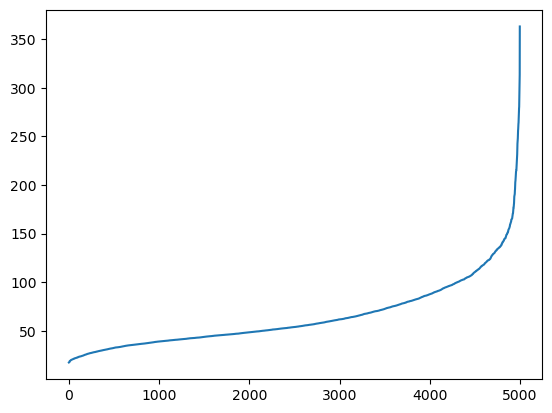

In [9]:
c0 = pca.find_center(X0)
print(c0)
plt.plot(sorted(pca.distance_center(X0, c0)) ) #, marker='s', markersize=4)
plt.show()

[-2.23021227e-01 -1.59273380e+00 -2.44696648e+00 -3.09057779e+00
 -3.16113538e+00 -2.87457158e+00 -2.30881698e+00 -1.84885604e+00
 -1.46028613e+00 -9.71032984e-01 -6.10012148e-01 -4.53117118e-01
 -3.56196600e-01 -2.79614288e-01 -1.92178815e-01 -1.13529980e-01
 -6.36484033e-02 -3.67599801e-02 -3.89387650e-02 -4.51664711e-02
 -5.26466621e-02 -6.54572175e-02 -7.43881730e-02 -8.74764961e-02
 -1.04908357e-01 -1.18921384e-01 -1.38083967e-01 -1.58845043e-01
 -1.78122986e-01 -2.00242729e-01 -2.25856590e-01 -2.50916243e-01
 -2.75529450e-01 -2.92453394e-01 -3.04300214e-01 -3.17742115e-01
 -3.19105084e-01 -3.14155051e-01 -3.02714847e-01 -2.89785166e-01
 -2.62912362e-01 -2.29543925e-01 -1.95900382e-01 -1.57291543e-01
 -1.20654141e-01 -8.15753705e-02 -4.73914480e-02 -2.05671715e-02
  3.50792540e-04  1.17565439e-02  2.37131174e-02  2.85607666e-02
  3.63162921e-02  4.34910226e-02  4.53086426e-02  5.61474524e-02
  5.69480301e-02  6.59515858e-02  8.27767258e-02  9.19972618e-02
  1.03446258e-01  1.16425

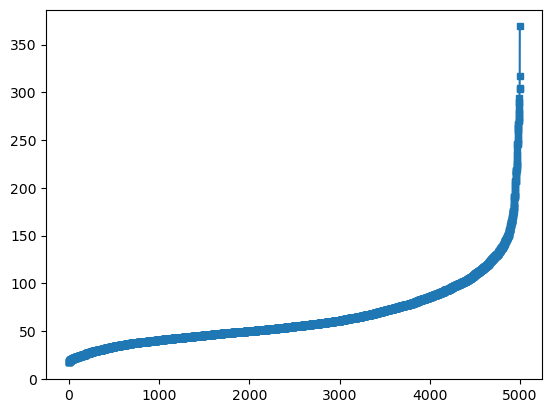

In [14]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.001), alpha=0.95)
c = pca.find_rob_center(X0, wma)
print(c)
plt.plot(sorted(pca.distance_center(X0, c)), marker='s', markersize=4)
plt.show()

In [15]:
X1 = X0 - c
X1_0 = X0 - c0

In [16]:
a1_0, L1_0 = pca.find_pc(X1_0)
print(L1_0, a1_0)

35.62845227495256 [ 3.00662779e-02  1.20462574e-01  1.67867953e-01  1.71067497e-01
  1.39712711e-01  7.82234076e-02  7.35775210e-03 -2.36903453e-02
 -3.47981660e-02 -5.02792407e-02 -4.69199836e-02 -2.70388810e-02
 -1.10216324e-02  1.22646707e-03  1.33762541e-02  2.62276812e-02
  3.75426226e-02  4.55260694e-02  5.04346144e-02  5.29301257e-02
  5.46799963e-02  5.64459710e-02  5.82010614e-02  6.04164103e-02
  6.24327928e-02  6.48468738e-02  6.72647132e-02  6.96990455e-02
  7.25228205e-02  7.49792069e-02  7.75693625e-02  7.99974995e-02
  8.21515135e-02  8.35122999e-02  8.43993181e-02  8.43993182e-02
  8.31333022e-02  8.11873119e-02  7.83692154e-02  7.45375616e-02
  6.95167499e-02  6.40146514e-02  5.74301014e-02  5.04954639e-02
  4.37626217e-02  3.69209623e-02  3.06447279e-02  2.56563424e-02
  2.14426749e-02  1.81293339e-02  1.58294545e-02  1.38469347e-02
  1.21041896e-02  1.05700515e-02  9.36852871e-03  7.83528286e-03
  6.87864148e-03  5.74164259e-03  4.41175859e-03  3.28156305e-03
  2.575

In [17]:
a1, L1 = pca.find_rob_pc(X1, wma)
print(L1, a1)

34.88400210920745 [-2.89700262e-02 -1.22176793e-01 -1.70555957e-01 -1.73401326e-01
 -1.40038976e-01 -7.62431850e-02 -3.61015112e-03  2.77600361e-02
  3.84545993e-02  5.44853882e-02  5.08055396e-02  2.99428464e-02
  1.34231773e-02  7.25945239e-04 -1.17436927e-02 -2.48504092e-02
 -3.62029897e-02 -4.42857970e-02 -4.92298109e-02 -5.17663737e-02
 -5.33402845e-02 -5.51312664e-02 -5.69700860e-02 -5.92025032e-02
 -6.12825984e-02 -6.38602842e-02 -6.62628560e-02 -6.88042471e-02
 -7.17876697e-02 -7.42279572e-02 -7.67735022e-02 -7.93719183e-02
 -8.15215335e-02 -8.29153372e-02 -8.40481913e-02 -8.39879149e-02
 -8.27581035e-02 -8.07972194e-02 -7.80255792e-02 -7.40580373e-02
 -6.89104585e-02 -6.31579718e-02 -5.65365634e-02 -4.94776533e-02
 -4.24565802e-02 -3.55676942e-02 -2.92748241e-02 -2.42305064e-02
 -2.00898371e-02 -1.66801198e-02 -1.43627488e-02 -1.23550302e-02
 -1.06677521e-02 -9.07645979e-03 -7.62517427e-03 -6.23483792e-03
 -5.30747755e-03 -4.23242894e-03 -3.01447134e-03 -1.95408560e-03
 -1.077

In [18]:
# aa = 16/9
# plt.figure(figsize=(3,3*aa))
# plt.scatter(X0[:,0], X0[:,1], c='w', edgecolors='k')
# plt.scatter([c0[0]], [c0[1]], s=81, c='w', edgecolors='k')
# plt.scatter([c[0]], [c[1]], s=81, c='w', edgecolors='k')
# plt.plot([c0[0], c0[0]+a1_0[0]], [c0[1], c0[1]+a1_0[1]], c='k', linestyle='--', label='pca')
# plt.plot([c[0], c[0]+a1[0]], [c[1], c[1]+a1[1]], c='k', label='robust_pca')
# plt.legend()
# plt.show()

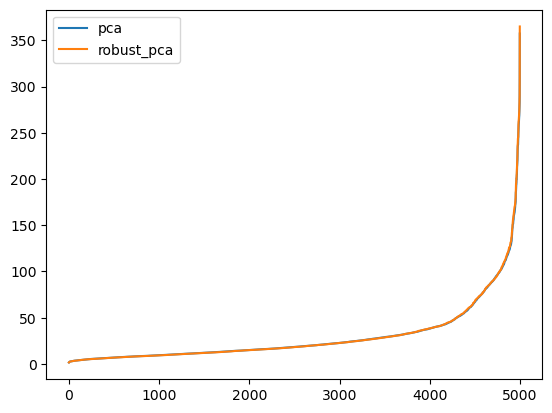

In [20]:
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), label='pca')
plt.plot(sorted(pca.distance_line(X1, a1)), label='robust_pca')
plt.legend()
plt.show()

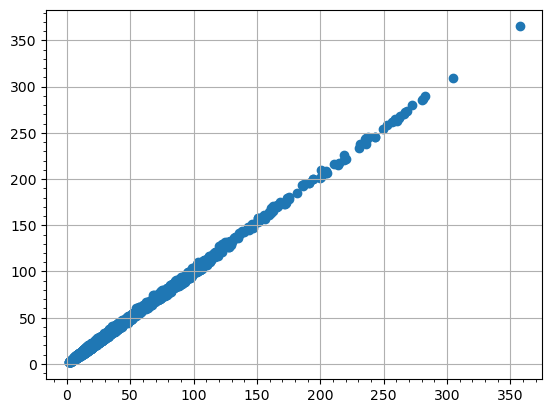

In [21]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [22]:
X2 = pca.project(X1, a1)
X2_0 = pca.project(X1_0, a1_0)

In [23]:
a2_0, L2_0 = pca.find_pc(X2_0)
print(L2_0, a2_0)

6.643870822475339 [ 0.01882911  0.11874837  0.13880578  0.12358651  0.062243   -0.01666705
 -0.07875522 -0.09820111 -0.10524286 -0.11881312 -0.11632035 -0.10654618
 -0.09216568 -0.0789773  -0.07070275 -0.06668534 -0.06506676 -0.06392234
 -0.06220758 -0.0603813  -0.05937985 -0.05794225 -0.05626114 -0.05423866
 -0.05158312 -0.04899279 -0.04695215 -0.04479087 -0.0423454  -0.03998258
 -0.03802899 -0.03560683 -0.0334188  -0.03222479 -0.03100663 -0.0315498
 -0.03235322 -0.03317579 -0.03554694 -0.03805846 -0.04203292 -0.04734808
 -0.05067463 -0.05456778 -0.05866274 -0.06208254 -0.06461947 -0.06516634
 -0.06544519 -0.06529371 -0.06476386 -0.06336068 -0.06235591 -0.06073932
 -0.05818292 -0.05569195 -0.0534068  -0.05162793 -0.04945792 -0.04776297
 -0.04590718 -0.04366433 -0.04187535 -0.04097098 -0.0408035  -0.03993796
 -0.03865614 -0.0378316  -0.03730122 -0.03681154 -0.03723087 -0.03661121
 -0.03530113 -0.0341953  -0.03276407 -0.03108136 -0.02929499 -0.02741355
 -0.02594196 -0.02313258 -0.020040

In [24]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.01), alpha=0.95)
a2, L2 = pca.find_rob_pc(X2, wma)
print(L2, a2)

5.882026174942954 [-1.21814141e-01 -2.34206070e-01 -2.13966064e-01 -1.72442719e-01
 -8.58079774e-02  9.11793119e-03  7.36811229e-02  9.05987489e-02
  1.03721769e-01  1.10697122e-01  9.80664444e-02  8.91136653e-02
  7.58901869e-02  6.40548279e-02  5.56482598e-02  5.30161446e-02
  5.02362666e-02  4.87781115e-02  4.90858263e-02  4.70169255e-02
  4.51137905e-02  4.39770036e-02  4.21183664e-02  4.16760682e-02
  4.23225978e-02  4.03618651e-02  3.84381107e-02  3.75367190e-02
  3.71093447e-02  3.54244447e-02  3.52813547e-02  3.44403481e-02
  3.37227987e-02  3.33259555e-02  3.37393640e-02  3.57306134e-02
  3.63247950e-02  3.84420493e-02  4.18724350e-02  4.57991876e-02
  4.91090972e-02  5.37851026e-02  5.73727685e-02  6.07500616e-02
  6.58470912e-02  6.82740448e-02  6.85387755e-02  6.76762489e-02
  6.84029607e-02  6.75433108e-02  6.61729357e-02  6.50063200e-02
  6.35335833e-02  6.13332212e-02  5.86762632e-02  5.59216698e-02
  5.30683584e-02  5.07354925e-02  5.02013227e-02  4.82117927e-02
  4.519

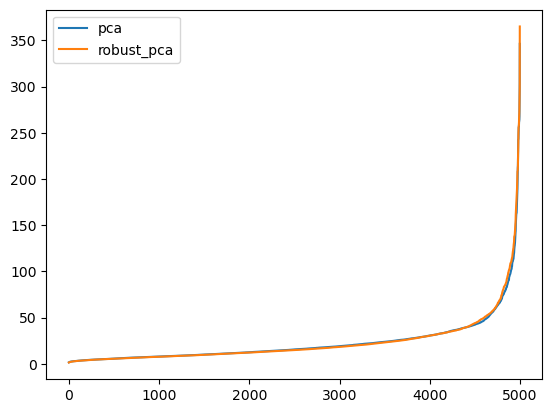

In [25]:
plt.plot(sorted(pca.distance_line(X2_0, a2_0)), label='pca')
plt.plot(sorted(pca.distance_line(X2, a2)), label='robust_pca')
plt.legend()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


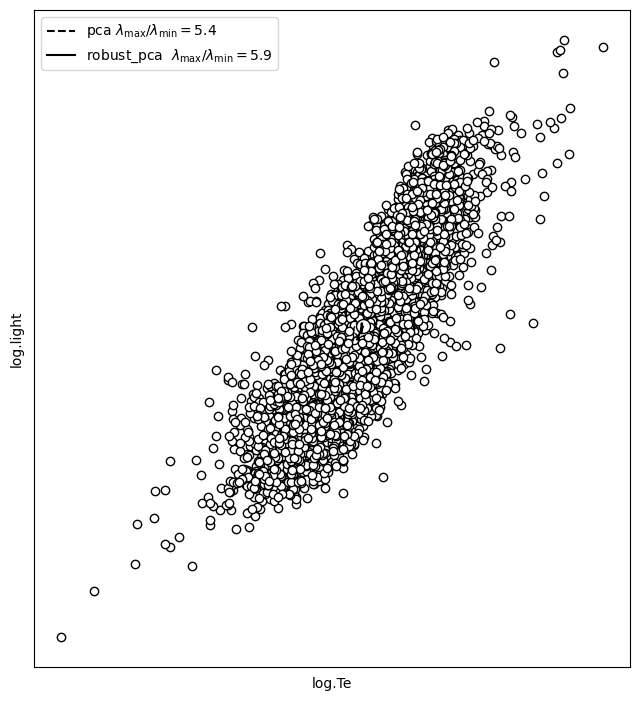

In [26]:
aa = 16/9
plt.figure(figsize=(6.5,4*aa))
plt.scatter(X0[:,0], X0[:,1], c='w', edgecolors='k')
plt.scatter([c0[0]], [c0[1]], s=100, c='w', edgecolors='k', linestyle='--')
plt.scatter([c[0]], [c[1]], s=100, c='w', edgecolors='k')
plt.plot([c0[0]+a1_0[0], c0[0], c0[0]+a2_0[0]], [c0[1]+a1_0[1], c0[1], c0[1]+a2_0[1]], 
         c='k', linestyle='--', label=r'pca $\lambda_\max/\lambda_\min=%.1f$' % (max(L2_0,L1_0)/min(L2_0,L1_0)))
plt.plot([c[0]+a1[0], c[0], c[0]+a2[0]], [c[1]+a1[1], c[1], c[1]+a2[1]], 
         c='k', label='robust_pca  $\lambda_\max/\lambda_\min=%.1f$' % (max(L2,L1)/min(L2,L1)))
plt.legend()
plt.xticks([])
plt.yticks([])
plt.xlabel('log.Te')
plt.ylabel('log.light')
plt.tight_layout()
plt.savefig('fig/robust_pca_starsCYG.eps')
plt.show()

In [30]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [32]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=0.9)
S = robust_scatter_matrix(X1, wma)
# print(S)

LinAlgError: SVD did not converge

In [21]:
L, A = np.linalg.eig(S)
print(A)
np.dot(A[0], A[1])

[[ 0.98352807  0.18075545]
 [-0.18075545  0.98352807]]


-2.7755575615628914e-17

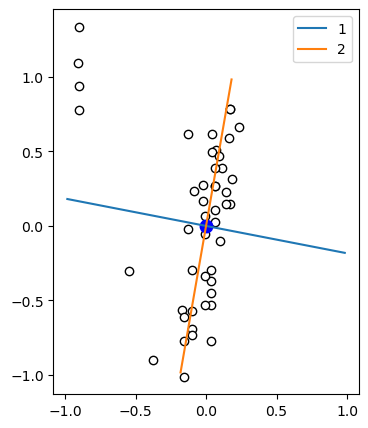

In [22]:
plt.figure(figsize=(7/(1920/1080),5))
plt.scatter(XY1[:,0], XY1[:,1], c='w', edgecolors='k')
plt.scatter([0], [0], s=81, c='b')
plt.plot([-A[0,0], 0, A[0,0]], [-A[1,0], 0, A[1,0]], label='1')
plt.plot([-A[0,1], 0, A[0,1]], [-A[1,1], 0, A[1,1]], label='2')
plt.legend()
plt.show()

In [27]:
from sklearn.decomposition import PCA

array([-2.62501772e-01, -1.64982840e+00, -2.49262258e+00, -3.11975432e+00,
       -3.16765559e+00, -2.86630628e+00, -2.27284516e+00, -1.79775402e+00,
       -1.40978385e+00, -9.35805899e-01, -5.86129533e-01, -4.34278041e-01,
       -3.37449000e-01, -2.58099485e-01, -1.84456157e-01, -1.20129323e-01,
       -7.05063409e-02, -4.19367919e-02, -3.71301050e-02, -4.13370244e-02,
       -4.90098284e-02, -6.03073982e-02, -7.08428635e-02, -8.56001811e-02,
       -1.01285802e-01, -1.16193695e-01, -1.34577996e-01, -1.55945863e-01,
       -1.77671564e-01, -2.00842895e-01, -2.24423456e-01, -2.46853575e-01,
       -2.71650607e-01, -2.90474182e-01, -3.04662521e-01, -3.15294263e-01,
       -3.17018629e-01, -3.13238099e-01, -3.03381832e-01, -2.87468397e-01,
       -2.61417720e-01, -2.28090210e-01, -1.91084624e-01, -1.50887349e-01,
       -1.08158061e-01, -6.95495189e-02, -3.57852661e-02, -8.60794065e-03,
        1.32494769e-02,  2.92759326e-02,  3.96302863e-02,  4.78478759e-02,
        5.44581983e-02,  

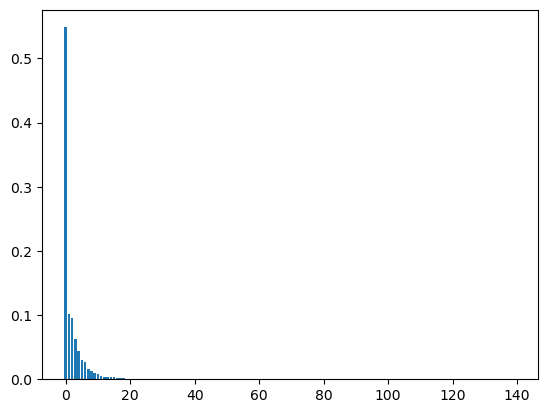

In [29]:
pca_sk = PCA()
pca_sk.fit(X0)
AA = pca_sk.components_
plt.bar(range(140), pca_sk.explained_variance_ratio_)
pca_sk.mean_

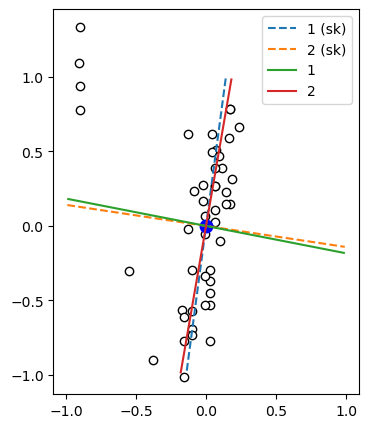

In [25]:
plt.figure(figsize=(7/(1920/1080),5))
plt.scatter(XY1[:,0], XY1[:,1], c='w', edgecolors='k')
plt.scatter([0], [0], s=81, c='b')
plt.plot([-AA[0,0], 0, AA[0,0]], [-AA[1,0], 0, AA[1,0]], linestyle='--', label='1 (sk)')
plt.plot([-AA[0,1], 0, AA[0,1]], [-AA[1,1], 0, AA[1,1]], linestyle='--', label='2 (sk)')
plt.plot([-A[0,0], 0, A[0,0]], [-A[1,0], 0, A[1,0]], label='1')
plt.plot([-A[0,1], 0, A[0,1]], [-A[1,1], 0, A[1,1]], label='2')
plt.legend()
plt.show()